In [1]:
####import libraries

#set GPU to use
import os
os.environ["THEANO_FLAGS"] = "device=cuda1,floatX=float32,exception_verbosity='high'"

#theano
from theano import *
import theano.tensor as T

#deep embedding kernel
from DEK import *

#utility functions from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.utils import resample, shuffle
from sklearn.decomposition import KernelPCA

#benchmarking models from SKLearn
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#other libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook




WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using cuDNN version 6021 on context None
Mapped name None to device cuda1: GeForce GTX 1080 Ti (0000:02:00.0)


## Testing

### Load and process data

Only numeric, therefore normalize

In [5]:
import pandas as pd

data = pd.read_csv('data/CTG.csv',header=None)
X = normalize(data.values[:,:-2],axis=0,norm='max')
Y = data.values[:,-1]

trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5)
trainX.shape, np.unique(trainY, return_counts=True)

### Deep embedding kernel

In [ ]:
hiddens = [[trainX.shape[1]*3 for _ in range(2)], [trainX.shape[1]*6 for _ in range(2)]]

dek = create_DEK(trainX, hiddens=hiddens)

#reshuffle nearest neighbors every 100 epochs
for ep in range(100):
    #index arrays for paired data
    i1, i2 = rank_filter(trainX,trainY.reshape(-1,1),0.5,kernel=dk.kernel)
    #similarity label
    kY = ((trainY[i1]==trainY[i2])*1.).reshape(-1,1)
    #training
    dk = train_DEK(dk,
                   np.stack([trainX[i1],trainX[i2]]),
                   kY.reshape(-1,1),
                   learning_rate=0.1,
                   n_epochs=100,
                   batch_size=10000,
                   reg=1e-6
                  )

(756337,)
0 (array([ 0.,  1.]), array([394621, 361716])) 0.478247130578
...training
epoch 1, minibatch 75/75, current cost 0.011621
epoch 2, minibatch 75/75, current cost 0.010799
epoch 3, minibatch 75/75, current cost 0.010169
epoch 4, minibatch 75/75, current cost 0.009645
epoch 5, minibatch 75/75, current cost 0.009221
epoch 6, minibatch 75/75, current cost 0.008874
epoch 7, minibatch 75/75, current cost 0.008564
epoch 8, minibatch 75/75, current cost 0.008274
epoch 9, minibatch 75/75, current cost 0.008017
epoch 10, minibatch 75/75, current cost 0.007778
epoch 11, minibatch 75/75, current cost 0.007661
epoch 12, minibatch 75/75, current cost 0.007493
epoch 13, minibatch 75/75, current cost 0.007284
epoch 14, minibatch 75/75, current cost 0.007117
epoch 15, minibatch 75/75, current cost 0.006892
epoch 16, minibatch 75/75, current cost 0.006795
epoch 17, minibatch 75/75, current cost 0.006667
epoch 18, minibatch 75/75, current cost 0.006481
epoch 19, minibatch 75/75, current cost 0.0

epoch 166, minibatch 75/75, current cost 0.002855
epoch 167, minibatch 75/75, current cost 0.002853
epoch 168, minibatch 75/75, current cost 0.002852
epoch 169, minibatch 75/75, current cost 0.002850
epoch 170, minibatch 75/75, current cost 0.002848
epoch 171, minibatch 75/75, current cost 0.002847
epoch 172, minibatch 75/75, current cost 0.002845
epoch 173, minibatch 75/75, current cost 0.002843
epoch 174, minibatch 75/75, current cost 0.002842
epoch 175, minibatch 75/75, current cost 0.002840
epoch 176, minibatch 75/75, current cost 0.002838
epoch 177, minibatch 75/75, current cost 0.002837
epoch 178, minibatch 75/75, current cost 0.002835
epoch 179, minibatch 75/75, current cost 0.002834
epoch 180, minibatch 75/75, current cost 0.002832
epoch 181, minibatch 75/75, current cost 0.002830
epoch 182, minibatch 75/75, current cost 0.002829
epoch 183, minibatch 75/75, current cost 0.002827
epoch 184, minibatch 75/75, current cost 0.002825
epoch 185, minibatch 75/75, current cost 0.002823


epoch 330, minibatch 75/75, current cost 0.002475
epoch 331, minibatch 75/75, current cost 0.002473
epoch 332, minibatch 75/75, current cost 0.002471
epoch 333, minibatch 75/75, current cost 0.002470
epoch 334, minibatch 75/75, current cost 0.002468
epoch 335, minibatch 75/75, current cost 0.002466
epoch 336, minibatch 75/75, current cost 0.002465
epoch 337, minibatch 75/75, current cost 0.002463
epoch 338, minibatch 75/75, current cost 0.002461
epoch 339, minibatch 75/75, current cost 0.002459
epoch 340, minibatch 75/75, current cost 0.002456
epoch 341, minibatch 75/75, current cost 0.002454
epoch 342, minibatch 75/75, current cost 0.002452
epoch 343, minibatch 75/75, current cost 0.002451
epoch 344, minibatch 75/75, current cost 0.002448
epoch 345, minibatch 75/75, current cost 0.002446
epoch 346, minibatch 75/75, current cost 0.002444
epoch 347, minibatch 75/75, current cost 0.002442
epoch 348, minibatch 75/75, current cost 0.002440
epoch 349, minibatch 75/75, current cost 0.002438


epoch 494, minibatch 75/75, current cost 0.002189
epoch 495, minibatch 75/75, current cost 0.002188
epoch 496, minibatch 75/75, current cost 0.002188
epoch 497, minibatch 75/75, current cost 0.002187
epoch 498, minibatch 75/75, current cost 0.002186
epoch 499, minibatch 75/75, current cost 0.002186
epoch 500, minibatch 75/75, current cost 0.002185
epoch 501, minibatch 75/75, current cost 0.002185
epoch 502, minibatch 75/75, current cost 0.002184
epoch 503, minibatch 75/75, current cost 0.002184
epoch 504, minibatch 75/75, current cost 0.002184
epoch 505, minibatch 75/75, current cost 0.002183
epoch 506, minibatch 75/75, current cost 0.002183
epoch 507, minibatch 75/75, current cost 0.002182
epoch 508, minibatch 75/75, current cost 0.002182
epoch 509, minibatch 75/75, current cost 0.002182
epoch 510, minibatch 75/75, current cost 0.002181
epoch 511, minibatch 75/75, current cost 0.002181
epoch 512, minibatch 75/75, current cost 0.002181
epoch 513, minibatch 75/75, current cost 0.002180


epoch 658, minibatch 75/75, current cost 0.002157
epoch 659, minibatch 75/75, current cost 0.002157
epoch 660, minibatch 75/75, current cost 0.002157
epoch 661, minibatch 75/75, current cost 0.002157
epoch 662, minibatch 75/75, current cost 0.002157
epoch 663, minibatch 75/75, current cost 0.002157
epoch 664, minibatch 75/75, current cost 0.002157
epoch 665, minibatch 75/75, current cost 0.002157
epoch 666, minibatch 75/75, current cost 0.002157
epoch 667, minibatch 75/75, current cost 0.002157
epoch 668, minibatch 75/75, current cost 0.002157
epoch 669, minibatch 75/75, current cost 0.002157
epoch 670, minibatch 75/75, current cost 0.002157
epoch 671, minibatch 75/75, current cost 0.002157
epoch 672, minibatch 75/75, current cost 0.002157
epoch 673, minibatch 75/75, current cost 0.002157
epoch 674, minibatch 75/75, current cost 0.002156
epoch 675, minibatch 75/75, current cost 0.002156
epoch 676, minibatch 75/75, current cost 0.002156
epoch 677, minibatch 75/75, current cost 0.002156


epoch 822, minibatch 75/75, current cost 0.002151
epoch 823, minibatch 75/75, current cost 0.002151
epoch 824, minibatch 75/75, current cost 0.002151
epoch 825, minibatch 75/75, current cost 0.002151
epoch 826, minibatch 75/75, current cost 0.002151
epoch 827, minibatch 75/75, current cost 0.002151
epoch 828, minibatch 75/75, current cost 0.002151
epoch 829, minibatch 75/75, current cost 0.002150
epoch 830, minibatch 75/75, current cost 0.002150
epoch 831, minibatch 75/75, current cost 0.002150
epoch 832, minibatch 75/75, current cost 0.002150
epoch 833, minibatch 75/75, current cost 0.002150
epoch 834, minibatch 75/75, current cost 0.002150
epoch 835, minibatch 75/75, current cost 0.002150
epoch 836, minibatch 75/75, current cost 0.002150
epoch 837, minibatch 75/75, current cost 0.002150
epoch 838, minibatch 75/75, current cost 0.002150
epoch 839, minibatch 75/75, current cost 0.002150
epoch 840, minibatch 75/75, current cost 0.002150
epoch 841, minibatch 75/75, current cost 0.002150


In [349]:
#generate training and testing gram matrices
#training
i1,i2 = np.triu_indices(n=trainX.shape[0])
k_h = dk.predict(np.stack([trainX[i1].astype(np.float32),trainX[i2].astype(np.float32)]))
train_gram = gen_gram(trainX.shape[0],k_h.flatten())

#testing
it1 = np.repeat(np.arange(testX.shape[0]),repeats=trainX.shape[0])
it2 = np.tile(np.arange(trainX.shape[0]),reps=testX.shape[0])
Ktest = dk.predict(np.stack([testX[it1],trainX[it2]]).astype(np.float32))
test_gram = Ktest.reshape(testX.shape[0],trainX.shape[0])

#### SVM with deep embedding kernel

In [350]:
#finetune SVM using DEK
scores = []
Cs = []
for i in range(100):
    C = 0.01 + 0.01*i
    dek_svc = SVC(kernel='precomputed',C=C)
    dek_svc.fit(train_gram,trainY)
    scores.append(dek_svc.score(train_gram,trainY))
    Cs.append(C)
#test best model
dek_svc = SVC(kernel='precomputed', C=Cs[np.argmax(scores)])
print dek_svc.score(test_gram,testY)

0.98682972718720607

#### KNN with deep embedding kernel

In [352]:
scores = []
Ks= []

#finding best k
for k in range(1,100):
    train_kY = np.tile(trainY,reps=trainY.shape[0])
    sorted_ind = np.argsort(-train_gram,axis=1,)
    sorted_y = train_kY[sorted_ind.flatten()].reshape(trainY.shape[0],trainY.shape[0])
    y_p = mode(sorted_y[:,:k],axis=1)[0]
    K = mode(sorted_y[:,:k],axis=1)[1]
    scores.append(np.mean(y_p.flatten()==trainY))
    Ks.append(k)

best_k = Ks[np.argmax(scores)]

#get prediction on test data
test_kY = np.tile(trainY,reps=testY.shape[0])
sorted_ind = np.argsort(-test_gram,axis=1,)
sorted_y = test_kY[sorted_ind.flatten()].reshape(testY.shape[0],trainY.shape[0])
y_p = mode(sorted_y[:,:best_k],axis=1)[0]
K = mode(sorted_y[:,:best_k],axis=1)[1]

print np.mean(y_p.flatten()==testY)

0.98682972718720607

### RBF Support Vector Machine

In [267]:
param_grid = {
    'gamma' : [1e-3,1e-2,1e-1,1,1e1,1e2,1e3],
    'C' : [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
}

svm_search = GridSeachCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_search.fit(trainX, trainY)

print svm_search.best_estimator_.score(testX, testY)

0.98477046095954846

### Gradient boosting

In [270]:
param_grid = {
    'n_estimator' : [25, 50, 100, 150, 200],
}

gbt_search = GridSeachCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
gbt_search.fit(trainX,trainY)
print gbt_search.best_estimator_.score(testX, testY)

0.98400752587


### Random forest

In [271]:
param_grid = {
    'n_estimator' : [25, 50, 100, 150, 200],
}

rf_search = GridSeachCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
rf_search.fit(trainX,trainY)
print rf_search.best_estimator_.score(testX, testY)

0.984948259643


### Regular neural network

In [273]:
for nl in range(6):
    mlp = MLPClassifier(hidden_layer_sizes=[trainX.shape[0] for _ in range(1,nl)])
    mlp.fit(trainX,trainY)
    print mlp.score(testX,testY)

0.977422389464
0.975540921919
0.98400752587
0.986829727187
0.985888993415
0.965192850423


## Visualization of feature space with kernel PCA

### Deep embedding kernel

In [201]:
kpca = KernelPCA(n_components=3,kernel='precomputed')
kpca.fit(K_train)
train3d = kpca.transform(K_train)
test3d = kpca.transform(test_gram)

<IPython.core.display.Javascript object>


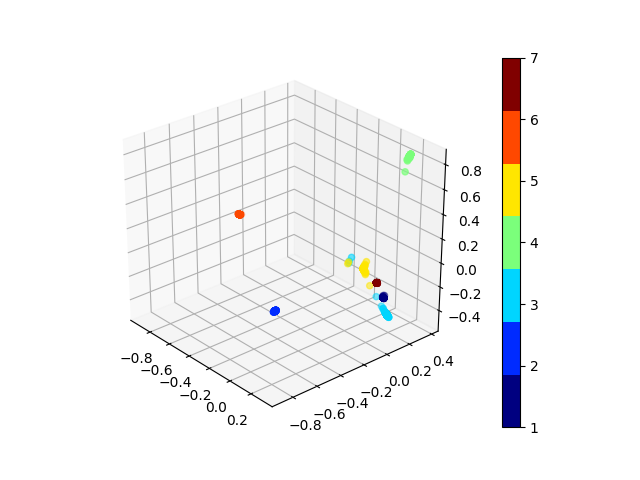

<IPython.core.display.Javascript object>


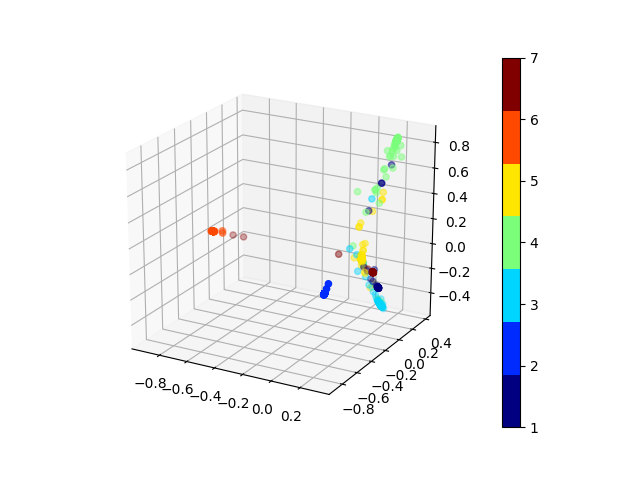

In [203]:
cmap = plt.get_cmap('jet', len(np.unique(trainY)))
cmap.set_under('gray')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = ax.scatter(train3d[:,0], train3d[:,1],train3d[:,2],c=trainY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = ax.scatter(test3d[:,0], test3d[:,1],test3d[:,2],c=testY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show() 

<IPython.core.display.Javascript object>


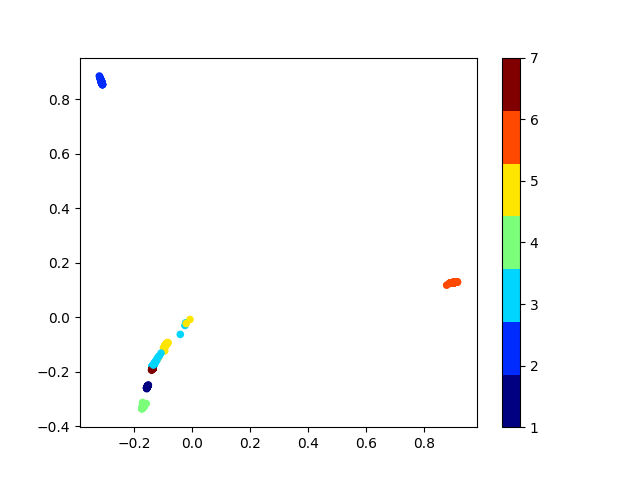

<IPython.core.display.Javascript object>


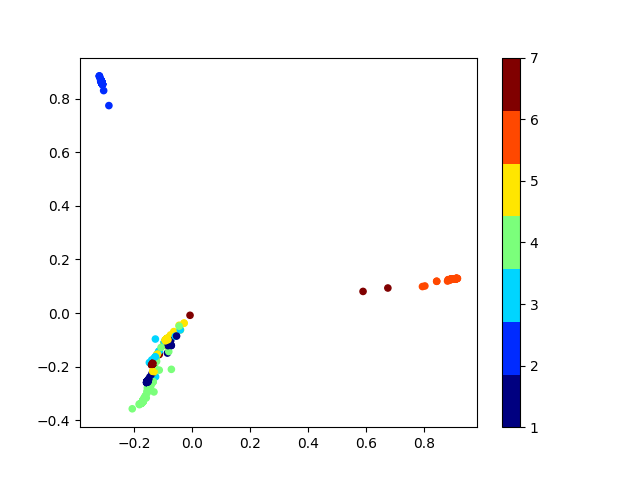

In [99]:
cmap = plt.get_cmap('jet', 7)
cmap.set_under('gray')

fig = plt.figure()
ax = fig.add_subplot(111)
points = ax.scatter(train3d[:,0], train3d[:,1],c=trainY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
points = ax.scatter(test3d[:,0], test3d[:,1],c=testY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show() 

### RBF Kernel PCA

<IPython.core.display.Javascript object>


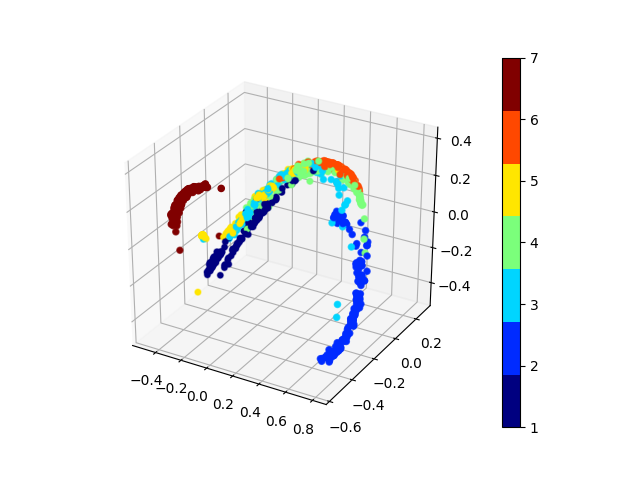

<IPython.core.display.Javascript object>


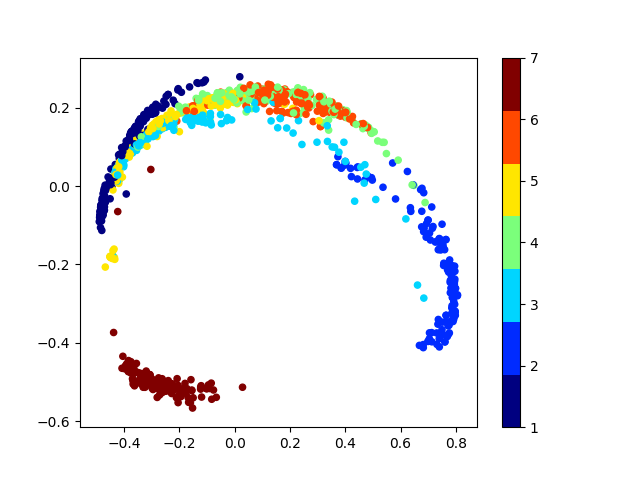

In [100]:
kpca = KernelPCA(n_components=3,kernel='rbf',gamma=0.1)
kpca.fit(trainX)
rtest3d = kpca.transform(testX)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = ax.scatter(rtest3d[:,0],rtest3d[:,1],rtest3d[:,2],c=testY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111)
points = ax.scatter(rtest3d[:,0],rtest3d[:,1],c=testY,s=20,cmap=cmap)
fig.colorbar(points)
plt.show() 